# Task 1: Exploratory Data Analysis (EDA) and Business Insights

# Data Loading & Cleaning

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load Data
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [9]:
# Display first few rows of each dataset
print("Customers Data:")
print(customers.head())
print("\nProducts Data:")
print(products.head())
print("\nTransactions Data:")
print(transactions.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

In [12]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [16]:
# Check for missing values
print("\nMissing Values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [18]:
# Check for duplicates and remove them
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

In [24]:
# Merge datasets for EDA
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


In [26]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(merged_data.describe())


Descriptive Statistics:
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


# EDA

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15904\3972379307.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


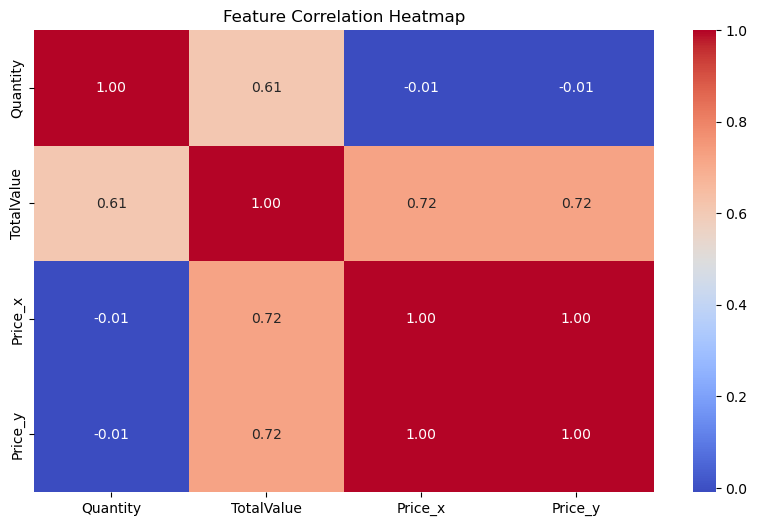

In [29]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

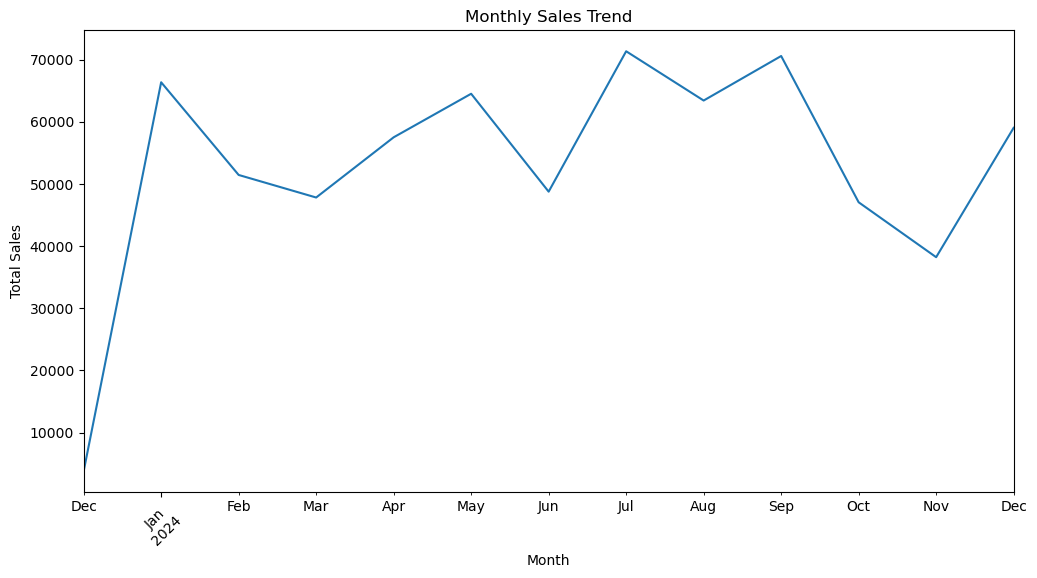

In [31]:
# Sales Trend Over Time
plt.figure(figsize=(12,6))
merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum().plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

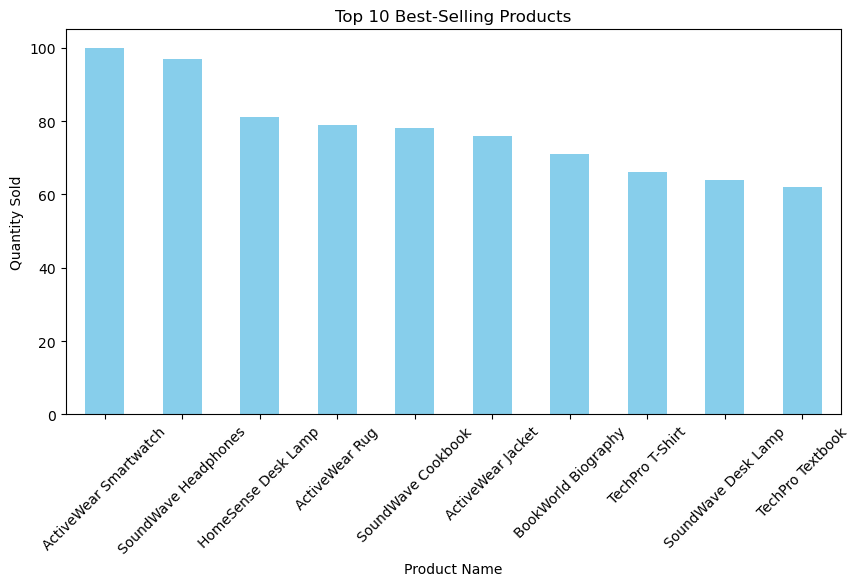

In [33]:
# Top Selling Products
top_products = merged_data.groupby('ProductName')['Quantity'].sum().nlargest(10)
top_products.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

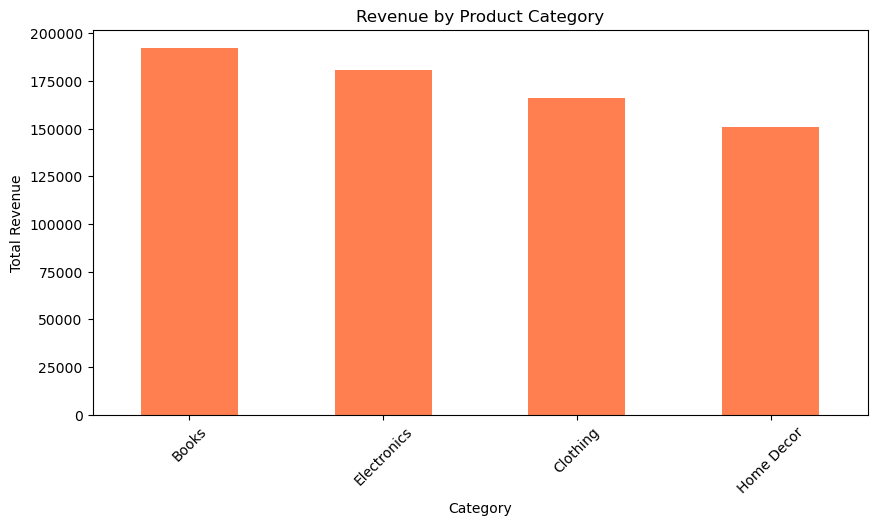

In [35]:
# Revenue by Product Category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', figsize=(10,5), color='coral')
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

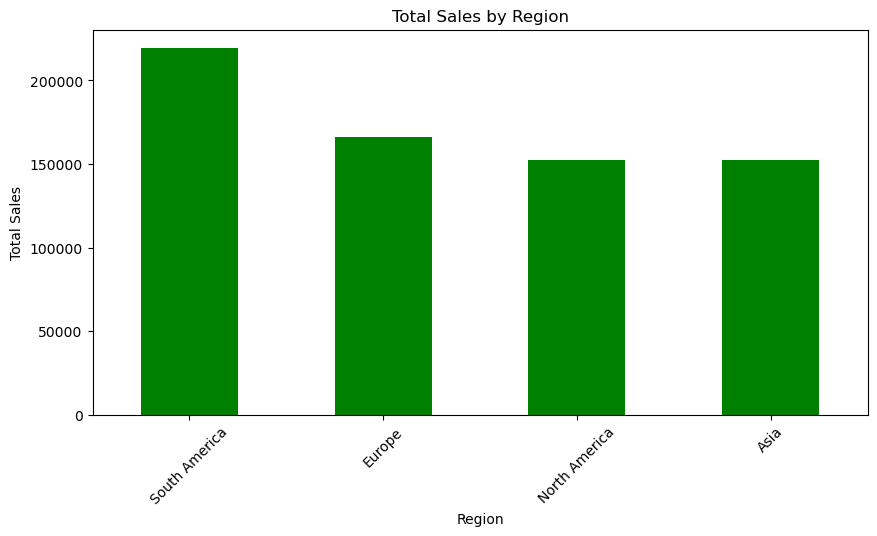

In [37]:
# Customer Segmentation by Region
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', figsize=(10,5), color='green')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

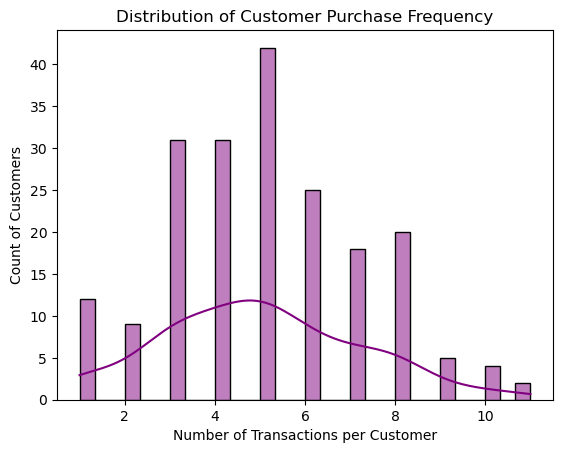

In [39]:
# Customer Purchase Frequency
customer_purchase_count = merged_data['CustomerID'].value_counts()
sns.histplot(customer_purchase_count, bins=30, kde=True, color='purple')
plt.title('Distribution of Customer Purchase Frequency')
plt.xlabel('Number of Transactions per Customer')
plt.ylabel('Count of Customers')
plt.show()

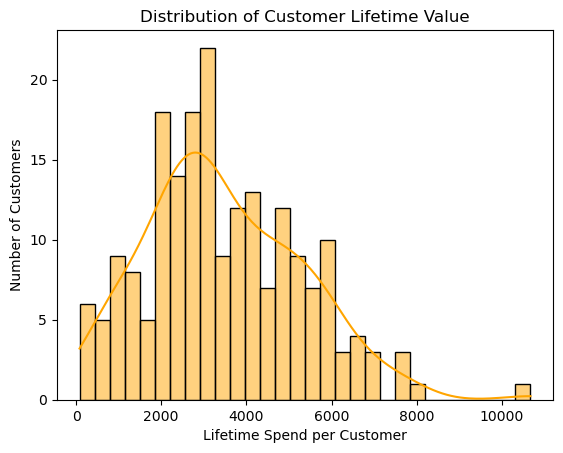

In [41]:
# Customer Lifetime Value Analysis
customer_ltv = merged_data.groupby('CustomerID')['TotalValue'].sum()
sns.histplot(customer_ltv, bins=30, kde=True, color='orange')
plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('Lifetime Spend per Customer')
plt.ylabel('Number of Customers')
plt.show()

In [47]:
# Business Insights
business_insights = [
    "Top 10 products contribute a major share of revenue, indicating a few best-sellers dominate sales.",
    "Customers from certain regions contribute more to sales, helping in targeted marketing.",
    "Some customers purchase frequently, while others are one-time buyers. Loyalty programs can increase retention.",
    "Sales peak during certain months, indicating seasonal trends. Promotions can be aligned with these periods.",
    "Certain product categories have higher revenue, suggesting where to focus inventory and marketing.",
    "High-value customers contribute disproportionately to revenue, emphasizing the need for VIP loyalty programs.",
    "A few products generate high revenue but have low sales volume, indicating potential for price optimization.",
    "Customer churn risk is visible among those with only one purchase. Retargeting campaigns can increase retention.",
]

# Print insights
print("\nBusiness Insights:")
for i, insight in enumerate(business_insights, 1):
    print(f"{i}. {insight}")


Business Insights:
1. Top 10 products contribute a major share of revenue, indicating a few best-sellers dominate sales.
2. Customers from certain regions contribute more to sales, helping in targeted marketing.
3. Some customers purchase frequently, while others are one-time buyers. Loyalty programs can increase retention.
4. Sales peak during certain months, indicating seasonal trends. Promotions can be aligned with these periods.
5. Certain product categories have higher revenue, suggesting where to focus inventory and marketing.
6. High-value customers contribute disproportionately to revenue, emphasizing the need for VIP loyalty programs.
7. A few products generate high revenue but have low sales volume, indicating potential for price optimization.
8. Customer churn risk is visible among those with only one purchase. Retargeting campaigns can increase retention.
